In [1]:
import pandas as pd 
import numpy as np

In [2]:
### 1.1 데이터 불러오기
train = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석 패키지/주제분석 2주차 패키지/train.csv')
test = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석 패키지/주제분석 2주차 패키지/test.csv')

In [3]:
### 1.2 단위 수정
train_x = train.drop('price',axis=1)
train_y = train['price']

In [4]:
### 1.3 validation set 분할 - 첫번째
from sklearn.model_selection import train_test_split
train_test_split(train, test_size=0.2) 

[          dong           apt  exclusive_use_area  floor   price  \
 365616     개포동       삼익대청아파트             39.5300     10   49500   
 300918     사당동      사당롯데캐슬2차             84.6140      7   52800   
 294501     대방동     보라매코오롱하늘채             84.7000      4   41800   
 349021     도곡동          도곡렉슬            119.8906     19  150000   
 167241     응암동    백련산힐스테이트1차             59.8500      6   37000   
 ...        ...           ...                 ...    ...     ...   
 246104     등촌동  등촌1,2단지주공아파트             41.8500     10   32000   
 115308      창동          현대조합             84.2100      2   36700   
 32422      화양동          화양타워             18.6200      2    9000   
 282811  영등포동3가      포레스트힐 시티             13.5300      7   11890   
 239342     방화동      대림e-편한세상             96.2800      2   40000   
 
         transaction_year  until_trans      sin_date      cos_date  
 365616                 4           25  1.000000e+00 -9.803364e-16  
 300918                 2           11  1.00

In [ ]:
### 1.4 질문
현재 데이터는 관측된 시간이 존재하다 보니 random으로 섞게 되면, 
시간 순서의 관계가 깨져버려 정확한 분석이 되지 않을 것이다.

In [5]:
### 1.5 validation set 분할 - 두번째
val_x = train_x[train_x['transaction_year']==4]
val_y = train[train['transaction_year']==4]
val_y = val_y['price']

train2_x = train_x[train_x['transaction_year']!=4]
train2_y = train[train['transaction_year']!=4]
train2_y = train2_y['price']

In [6]:
### 1.5 캣부스트 인코딩 전에
! pip install category_encoders

distutils: c:\users\iyuo1\appdata\local\programs\python\python39\Include\UNKNOWN
sysconfig: c:\users\iyuo1\appdata\local\programs\python\python39\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\iyuo1\appdata\local\programs\python\python39\Include\UNKNOWN
sysconfig: c:\users\iyuo1\appdata\local\programs\python\python39\Include
user = False
home = None
root = None
prefix = None


In [7]:
from category_encoders.cat_boost import CatBoostEncoder

In [8]:
### 1.6 캣부스트 인코딩
enc = CatBoostEncoder(cols=['dong','apt']).fit(train2_x,train2_y)
val_cbe= enc.transform(val_x)
val_cbe.head()

c:\users\iyuo1\appdata\local\programs\python\python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
2451,89176.597368,86280.203194,107.91,14,4,9,-1.000000e+00,-1.836970e-16
2452,89176.597368,86280.203194,151.81,10,4,9,-1.000000e+00,-1.836970e-16
2453,89176.597368,86280.203194,94.51,2,4,9,-2.449294e-16,1.000000e+00
2454,89176.597368,86280.203194,94.28,12,4,9,-2.449294e-16,1.000000e+00
2455,103789.156533,107170.755379,145.96,13,4,13,-1.000000e+00,-1.836970e-16


In [ ]:
## 2. 릿지 회귀(Ridge Regression)

<AxesSubplot:>

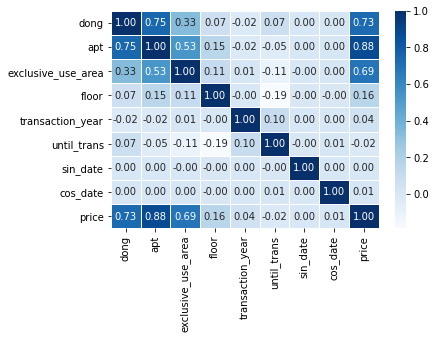

In [9]:
### 2.1 상관계수 플랏
import matplotlib.pyplot as plt
import seaborn as sns

train2_x_cbe = enc.transform(train2_x)
train_set= pd.concat([train2_x_cbe, train2_y], axis=1) 

sns.heatmap(data = train_set.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [10]:
### 2.2 해석과 무관하게 일단 릿지 튜닝
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

In [12]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1]

for a in alphas:
    model = Ridge(alpha=a).fit(train2_x_cbe, train2_y)
    pred_y = model.predict(val_cbe)
    rmse = sqrt(mean_squared_error(val_y, pred_y))
    print("Alpha:{0:.4f}, RMSE:{1: .5f}".format(a, rmse))

Alpha:0.0000, RMSE: 15377.97766
Alpha:0.0001, RMSE: 15377.97766
Alpha:0.0010, RMSE: 15377.97766
Alpha:0.0100, RMSE: 15377.97768
Alpha:0.1000, RMSE: 15377.97786


In [13]:
### 2.5 그냥 선형 모형으로!

from sklearn.linear_model import LinearRegression

lm=LinearRegression().fit(train2_x_cbe,train2_y)
pred_y=lm.predict(val_cbe)
mse = mean_squared_error(val_y,pred_y)
sqrt(mse)

15377.977659062974

In [14]:
# 3. LightGBM
! pip install lightgbm

distutils: c:\users\iyuo1\appdata\local\programs\python\python39\Include\UNKNOWN
sysconfig: c:\users\iyuo1\appdata\local\programs\python\python39\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\iyuo1\appdata\local\programs\python\python39\Include\UNKNOWN
sysconfig: c:\users\iyuo1\appdata\local\programs\python\python39\Include
user = False
home = None
root = None
prefix = None


In [ ]:
# 3.1 LightGBM 이해
Light GBM은 Leaf-wise방식을 사용해 최대 손실값을 가지는 리프 노드를 지속적으로 분할하고, 
트리의 깊이가 깊어지고 비대칭적인 트리가 생성되며, 균형 트리보다 예측오류를 최소화하고 속도가 향상된다. 
느린 XG boost를 개선한 부스팅 기법으로, 더 많은 실험으로 더 많은 성능을 높일 수 있다.
대용량 정형 데이터 분석에서 강력함이 더욱 드러난다.
단점으론 데이터셋이 작을 땐 오버피팅에 취약하다.

In [15]:
# 3.2 LGBM 튜닝
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMRegressor

rate = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.99]
ds =lgb.Dataset(train2_x_cbe,label=train2_y)
ds_t = lgb.Dataset(val_cbe,label=val_y)

m = []

for r in rate:
    param ={'learning_rate':r,'force_col_wise':True}
    model = lgb.train(param,train_set=ds,valid_sets=ds_t)
    y_pred = model.predict(val_cbe)
    rmse = sqrt(mean_squared_error(val_y,y_pred))
    m.append(rmse)

[LightGBM] [Info] Total Bins 881
[LightGBM] [Info] Number of data points in the train set: 312466, number of used features: 8
[LightGBM] [Info] Start training from score 46056.618349
[LightGBM] [Info] Total Bins 881
[LightGBM] [Info] Number of data points in the train set: 312466, number of used features: 8
[LightGBM] [Info] Start training from score 46056.618349
[LightGBM] [Info] Total Bins 881
[LightGBM] [Info] Number of data points in the train set: 312466, number of used features: 8
[LightGBM] [Info] Start training from score 46056.618349
[LightGBM] [Info] Total Bins 881
[LightGBM] [Info] Number of data points in the train set: 312466, number of used features: 8
[LightGBM] [Info] Start training from score 46056.618349
[LightGBM] [Info] Total Bins 881
[LightGBM] [Info] Number of data points in the train set: 312466, number of used features: 8
[LightGBM] [Info] Start training from score 46056.618349
[LightGBM] [Info] Total Bins 881
[LightGBM] [Info] Number of data points in the train

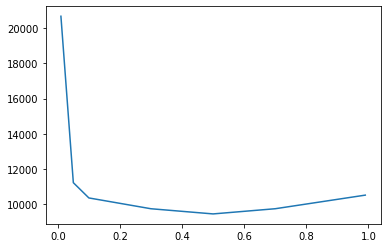

In [16]:
# 3.3 튜닝결과 시각화
plt.plot(rate,m)

In [ ]:
# 3.4 튜닝에 대해 알아보자!
Grid search는 모든 parameter의 경우의 수에 대해 cross-validation 결과가 가장 좋은 parameter를 고르는 방법이다.
좀 더 균등하고 전역적인 탐색이 가능하다는 장점이 있다.
하지만 탐색하고자하는 hyperparameter의 개수를 한 번에 여러 종류로 가져갈수록, 전체 탐색 시간이 기하급수적으로 증가한다는 단점이 있다.

Random search는 모든 grid를 전부 search하는 대신, random하게 일부의 parameter들만 관측한 후, 그 중에서 가장 좋은 parameter를 고른다.

Random Search는 중요한 parameter를 더 많이 탐색할 수 있기 때문에 최적화하기에 유리하다. 
반면, Grid Search는 중요하지 않은 hyper-parameter를 너무 많이 탐색한다고 한다.

Bayesian Optimization은 목적 함수(탐색대상함수)와 해당 하이퍼파라미터 쌍(pair)을 대상으로 Surrogate Model(대체 모델) 을 만들고, 평가를 통해 순차적으로 업데이트해 가면서 최적의 하이퍼파라미터 조합을 탐색한다.

In [ ]:
# 4. Test set

In [18]:
# 4.1 test set 불러오기
test=pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석 패키지/주제분석 2주차 패키지/test.csv')
test_x = test.drop('price',axis=1)
test_y = test['price']

In [19]:
# 4.2 캣부스트 인코딩
enc = CatBoostEncoder(cols=['dong','apt']).fit(train_x,train_y)
test_cbe= enc.transform(test_x)
test_cbe.head()

c:\users\iyuo1\appdata\local\programs\python\python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
0,91827.227742,89369.051084,70.80,1,5,10,-1.000000e+00,-1.836970e-16
1,91827.227742,89369.051084,94.51,8,5,10,-2.449294e-16,1.000000e+00
2,91827.227742,89369.051084,160.85,11,5,10,-2.449294e-16,1.000000e+00
3,91827.227742,89369.051084,94.51,6,5,10,1.000000e+00,3.061617e-16
4,91827.227742,89369.051084,136.40,3,5,10,1.000000e+00,3.061617e-16


In [21]:
# 4.3 최적의 파라미터 조합
# Linesar Regression
enc = CatBoostEncoder(cols=['dong','apt']).fit(train_x,train_y)
train_x_cbe= enc.transform(train_x)
lm=LinearRegression().fit(train_x_cbe,train_y)


# LGBM
ds =lgb.Dataset(train_x_cbe,label=train_y)
ds_t = lgb.Dataset(test_cbe,label=test_y)

param ={'learning_rate':0.5,'force_col_wise':True}
model = lgb.train(param,train_set=ds,valid_sets=ds_t)

c:\users\iyuo1\appdata\local\programs\python\python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


[LightGBM] [Info] Total Bins 888
[LightGBM] [Info] Number of data points in the train set: 422164, number of used features: 8
[LightGBM] [Info] Start training from score 48041.092876
